In [3]:
import subprocess 
import sys, bs4
def install(package):
    subprocess.check_call([sys.executable,'-m','pip','install',bs4])
from bs4 import BeautifulSoup

In [4]:
#pip install bs4
from bs4 import BeautifulSoup as bs
import requests
# need to look at the terms and conditions to know if we can scarpe the website
# most website have a file called www.google.com/robots.txt to see if and where scraping is allowed
url = 'http://quotes.toscrape.com/'

#get page response
response = requests.get(url)
response

<Response [200]>

In [5]:
response.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\n        <sp

In [6]:
soup = bs(response.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

In [7]:
print(soup.title)


<title>Quotes to Scrape</title>


In [8]:
all_divs = soup.find_all('div')
all_divs

[<div class="container">
 <div class="row header-box">
 <div class="col-md-8">
 <h1>
 <a href="/" style="text-decoration: none">Quotes to Scrape</a>
 </h1>
 </div>
 <div class="col-md-4">
 <p>
 <a href="/login">Login</a>
 </p>
 </div>
 </div>
 <div class="row">
 <div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag

In [9]:
# just get the div class = quote
quote_divs = soup.find_all('div',class_ = 'quote')
quote_divs

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>,
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
 <span>by <small class="author" itempr

In [10]:
import pandas as pd
#goal:get all the quotes and authors into a dataframe
page_one_results=[]
for div in quote_divs:
    #print(div)
    try:
        #find the text of the quote and save it as avariable
        quote_text = div.find('span', class_='text').text
        # find the author
        author = div.find('small',class_='author').text
        #print(find_author)
        quote_dict = {'quote':quote_text,
                      'author':author}
        page_one_results.append(quote_dict)
                      
        
        
    except AttributeError as e:
        print(e)
            
page_one_df = pd.DataFrame(page_one_results)
page_one_df

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [11]:
#goal:loop through all pages get  the quotes and author
all_quotes=[]
for i in range(1,11):
    url = f'https://quotes.toscrape.com/page/{i}'
    quotes_divs = soup.find_all('div',class_='quote')
    
    for div in quotes_divs:
        try:
            quote_text = div.find('span',class_='text').text
            author = div.find('small',class_='author').text
            quote_dict = {'quote':quote_text,
                         'author':author}
            all_quotes.append(quote_dict)
        except AttributeError as e:
            print(e)
all_quotes_df = pd.DataFrame(all_quotes)
all_quotes_df

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
...,...,...
95,“Try not to become a man of success. Rather be...,Albert Einstein
96,“It is better to be hated for what you are tha...,André Gide
97,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
98,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt


# chrome driver

In [12]:
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome',**executable_path,headless=False)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\12674\.wdm\drivers\chromedriver\win32\98.0.4758.102]


In [13]:
import time
all_quotes = []
url = 'http://quotes.toscrape.com/'
browser.visit(url)
for i in range(1,3):
    soup = bs(browser.html,'html.parser')
    all_divs = soup.find_all('div',class_='quote')
    for div in all_divs:
        try:
            quote_text = div.find('span',class_='text').text
            author = div.find('small',class_='author').text
            tags = div.find('div',class_='tags').find_all('a')
            tags_list = []
            for tag in tags:
                tags_list.append(tag.text)
                
            quote_dict = {'quote':quote_text,
                             'author':author,
                         'tags':tags_list}
            all_quotes.append(quote_dict)
        except AttributeError as e:
            print(e)
    browser.links.find_by_partial_text('Next').click()
    time.sleep(1)
    
    
df = pd.DataFrame(all_quotes)
df

,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"[adulthood, success, value]"
6,“It is better to be hated for what you are tha...,André Gide,"[life, love]"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"[edison, failure, inspirational, paraphrased]"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,[misattributed-eleanor-roosevelt]
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"[humor, obvious, simile]"


1. Use Splinter and/or Beautiful Soup to scrape mercadolibre.com.mx or soundcloud.com
or tripadvisor.com. You must programmatically click a link from the front page to go to
another page of interest to you and then select at least 5 items from that page. The 5
items must be stored in a data structure that makes sense (dictionary, list, etc).


In [3]:
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome',**executable_path,headless=False)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\12674\.wdm\drivers\chromedriver\win32\98.0.4758.102]


In [4]:
#pip install bs4
from bs4 import BeautifulSoup as bs
import requests
url = 'https://soundcloud.com/discover'


<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="#333" name="theme-color"/>
  <link href="//style.sndcdn.com" rel="dns-prefetch"/>
  <link href="//a-v2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//api-v2.soundcloud.com" rel="dns-prefetch"/>
  <link href="//sb.scorecardresearch.com" rel="dns-prefetch"/>
  <link href="//secure.quantserve.com" rel="dns-prefetch"/>
  <link href="//eventlogger.soundcloud.com" rel="dns-prefetch"/>
  <link href="//api.soundcloud.com" rel="dns-prefetch"/>
  <link href="//ssl.google-analytics.com" rel="dns-prefetch"/>
  <link href="//i1.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i3.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i4.sndcdn.com" rel="dns-prefetch"/>
  <link href="//wis.sndcdn.com" rel="dns-prefetch"/>
  <link href="//va.sndcdn.com" rel="dns-prefetch"/>
  <link href="//pixel.quantserve.com" rel="dns-prefetch"/>
  <title>
   Discover the top streamed music and songs o
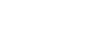
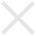
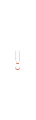
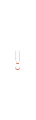
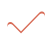
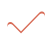
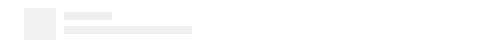

In [5]:

browser.visit(url)
soup = bs(browser.html,'html.parser')
print(soup.prettify())


In [40]:
import pandas as pd
all_divs = soup.find_all('div',class_="playableTile__image")
 
all_divs
top_5_list=[]
for div in all_divs[0:5]:
    try:
        #print(div)
        top_5 = div.find('span')['aria-label']
        
        #print(top_5)
        top_dict = {'Top 5':top_5}
        #print(top_dict)
        top_5_list.append(top_dict)
  
    except Exception as e:
        print(e)
df = pd.DataFrame(top_5_list)
df

,Top 5
0,Top 50: All music genres
1,Top 50: Hip-hop & Rap
2,Top 50: Pop
3,Top 50: R&B & Soul
4,Top 50: Global Beats


2. Share with your group how web scraping worked on the website and link you chose.
Compare it with others. List the site you chose and two observations about parsing the
website. Indicate if this was the same or different for the sites chosen by others

I worked on webscraping this website:
soundcloud.com
The html code was extremely dense with lots of markup. I struggled to find the content I was looking for in the sea of html metadata. It became easier once I understood the patterns in the html structure. One of the difficulty was the pull information from'aria-label':
Example: html: <span aria-label="Top 50: All music genres" 
The syntax here was to call on aria-label as though it were an index inside of span:
so I tried lot of ways to pull infromation out of 'aria-label'
Answer: div.find('span')['aria-label'] (.text was not needed in this case)
I compare with my clasmates who chose website soundcloud.com they said they have other difficulty and difficulty was extracting a url embedded in a larger string:
-Example html: 'background-image: url("https://i1.sndcdn.com/artworks-3MZHy2YEhMd3-0-t200x200.jpg"); width: 100%; height: 100%; opacity: 0;'
The only way to access this was with regex syntax:
- re.search('http.*jpg', div.find('span')['style']).group(0).